In [45]:
import pandas as pd
import numpy as np
import os
import logging
from sklearn.cluster import k_means
from sklearn.cluster import dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer



In [46]:
df_X=pd.read_csv('/Users/gautammehta/Desktop/walmart_sales_forecast_project/data/raw/X_train_raw.csv')
df_y=pd.read_csv('/Users/gautammehta/Desktop/walmart_sales_forecast_project/data/raw/y_train_raw.csv')

In [47]:
df_X.head(5)

Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      8  17-09-2010             0        75.32       2.582  214.878556   
1      7  11-03-2011             0        20.70       3.372  192.058484   
2     42  12-11-2010             0        61.24       3.130  126.546161   
3     15  26-08-2011             0        69.19       3.906  136.213613   
4     42  19-08-2011             0        87.40       3.743  129.240581   

   Unemployment  
0         6.315  
1         8.818  
2         9.003  
3         7.806  
4         8.257

In [48]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5148 non-null   int64  
 1   Date          5148 non-null   object 
 2   Holiday_Flag  5148 non-null   int64  
 3   Temperature   5148 non-null   float64
 4   Fuel_Price    5148 non-null   float64
 5   CPI           5148 non-null   float64
 6   Unemployment  5148 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 281.7+ KB


In [49]:
df_X.describe(include='object')

Date
count         5148
unique         143
top     21-09-2012
freq            42

In [50]:
df_X.describe()

Store  Holiday_Flag  Temperature   Fuel_Price          CPI  \
count  5148.000000   5148.000000  5148.000000  5148.000000  5148.000000   
mean     23.127428      0.067211    60.435437     3.363519   171.543292   
std      12.989904      0.250411    18.474075     0.456837    39.263725   
min       1.000000      0.000000    -2.060000     2.472000   126.064000   
25%      12.000000      0.000000    47.250000     2.938000   131.814218   
50%      23.000000      0.000000    62.530000     3.459000   182.783277   
75%      34.000000      0.000000    74.690000     3.738000   212.377784   
max      45.000000      1.000000   100.140000     4.468000   227.232807   

       Unemployment  
count   5148.000000  
mean       7.996731  
std        1.873195  
min        3.879000  
25%        6.891000  
50%        7.874000  
75%        8.622000  
max       14.313000

In [51]:
df=df_X.copy()
df['target']=df_y['Weekly_Sales']
df.head(5)

Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      8  17-09-2010             0        75.32       2.582  214.878556   
1      7  11-03-2011             0        20.70       3.372  192.058484   
2     42  12-11-2010             0        61.24       3.130  126.546161   
3     15  26-08-2011             0        69.19       3.906  136.213613   
4     42  19-08-2011             0        87.40       3.743  129.240581   

   Unemployment     target  
0         6.315  836707.85  
1         8.818  558963.83  
2         9.003  588592.61  
3         7.806  605413.17  
4         8.257  526641.23

In [52]:
# change date to date_time
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df.head(5)

Store       Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      8 2010-09-17             0        75.32       2.582  214.878556   
1      7 2011-03-11             0        20.70       3.372  192.058484   
2     42 2010-11-12             0        61.24       3.130  126.546161   
3     15 2011-08-26             0        69.19       3.906  136.213613   
4     42 2011-08-19             0        87.40       3.743  129.240581   

   Unemployment     target  
0         6.315  836707.85  
1         8.818  558963.83  
2         9.003  588592.61  
3         7.806  605413.17  
4         8.257  526641.23

In [53]:
df['months']=df['Date'].dt.month_name()


In [54]:
df.drop(columns='Date',inplace=True)

In [55]:
df.head(5)

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      8             0        75.32       2.582  214.878556         6.315   
1      7             0        20.70       3.372  192.058484         8.818   
2     42             0        61.24       3.130  126.546161         9.003   
3     15             0        69.19       3.906  136.213613         7.806   
4     42             0        87.40       3.743  129.240581         8.257   

      target     months  
0  836707.85  September  
1  558963.83      March  
2  588592.61   November  
3  605413.17     August  
4  526641.23     August

In [56]:
df['season']=''
def seasons(df):
    for x in range(len(df['months'])):
        if df['months'].iloc[x] in ['January','Feburary','March']:
            df['season'].iloc[x]='Winter'
        elif df['months'].iloc[x] in ['April','May','June']:
            df['season'].iloc[x]='Aut'
        elif df['months'].iloc[x] in ['July','Aug','Sept']:
            df['season'].iloc[x]='Summer'
        else:
            df['season'].iloc[x]='Spring'
seasons(df)

/var/folders/82/fhbz1rdx6fl8gc4pzrdbs77w0000gn/T/ipykernel_25290/379930747.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['season'].iloc[x]='Spring'
/var/folders/82/fhbz1rdx6fl8gc4pzrdbs77w0000gn/T/ipykernel_25290/379930747.py:11: S

In [57]:
df.head(5)

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      8             0        75.32       2.582  214.878556         6.315   
1      7             0        20.70       3.372  192.058484         8.818   
2     42             0        61.24       3.130  126.546161         9.003   
3     15             0        69.19       3.906  136.213613         7.806   
4     42             0        87.40       3.743  129.240581         8.257   

      target     months  season  
0  836707.85  September  Spring  
1  558963.83      March  Winter  
2  588592.61   November  Spring  
3  605413.17     August  Spring  
4  526641.23     August  Spring

In [58]:
df.drop(columns='months',inplace=True)

In [59]:
df.head(5)

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      8             0        75.32       2.582  214.878556         6.315   
1      7             0        20.70       3.372  192.058484         8.818   
2     42             0        61.24       3.130  126.546161         9.003   
3     15             0        69.19       3.906  136.213613         7.806   
4     42             0        87.40       3.743  129.240581         8.257   

      target  season  
0  836707.85  Spring  
1  558963.83  Winter  
2  588592.61  Spring  
3  605413.17  Spring  
4  526641.23  Spring

In [60]:
le=LabelEncoder()
df['season']=le.fit_transform(df['season'])

In [61]:
df.head(5)

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      8             0        75.32       2.582  214.878556         6.315   
1      7             0        20.70       3.372  192.058484         8.818   
2     42             0        61.24       3.130  126.546161         9.003   
3     15             0        69.19       3.906  136.213613         7.806   
4     42             0        87.40       3.743  129.240581         8.257   

      target  season  
0  836707.85       1  
1  558963.83       3  
2  588592.61       1  
3  605413.17       1  
4  526641.23       1

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.isna().sum()

Store           0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
target          0
season          0
dtype: int64

In [64]:
corr=df.corr()

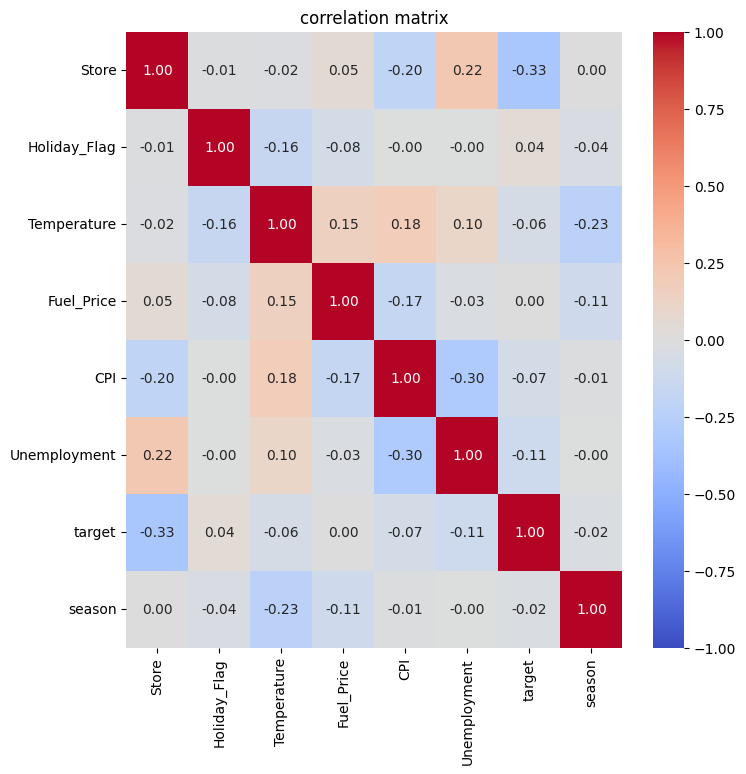

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('correlation matrix')
plt.show()


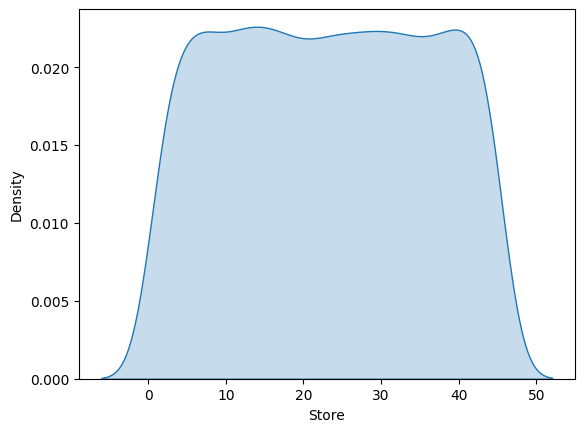

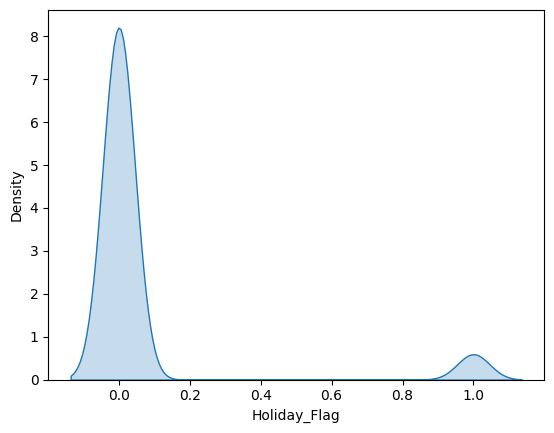

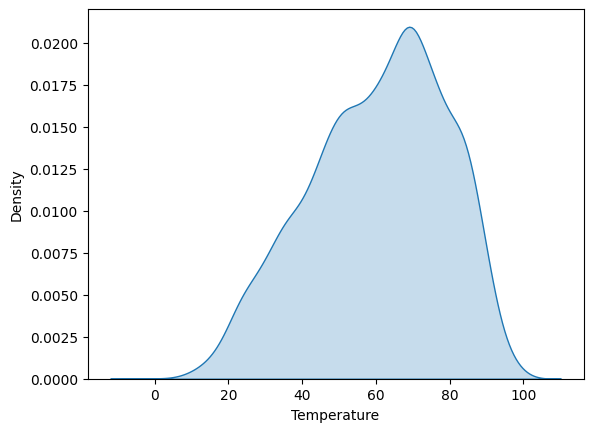

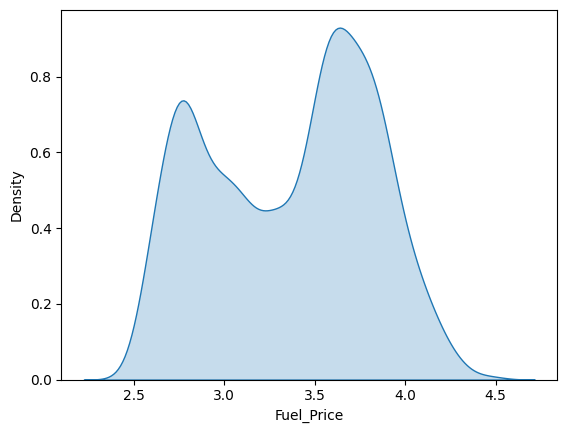

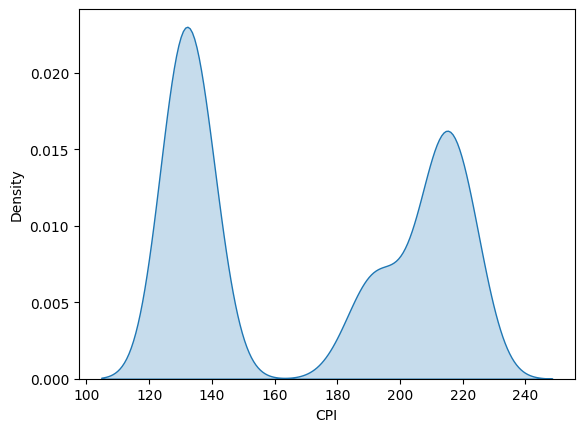

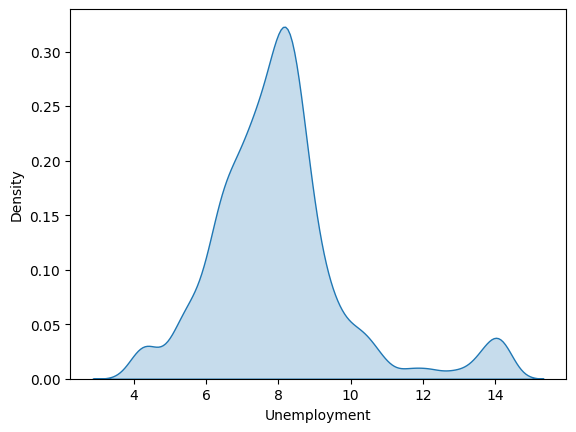

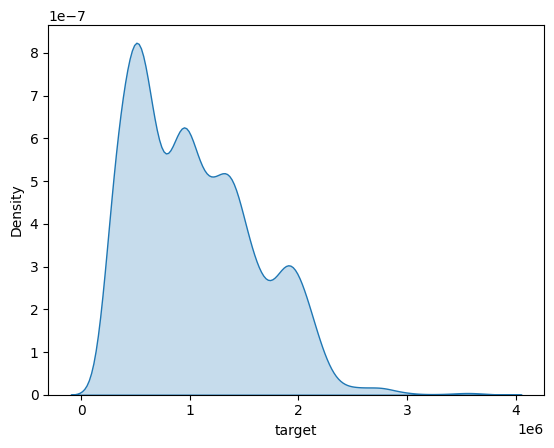

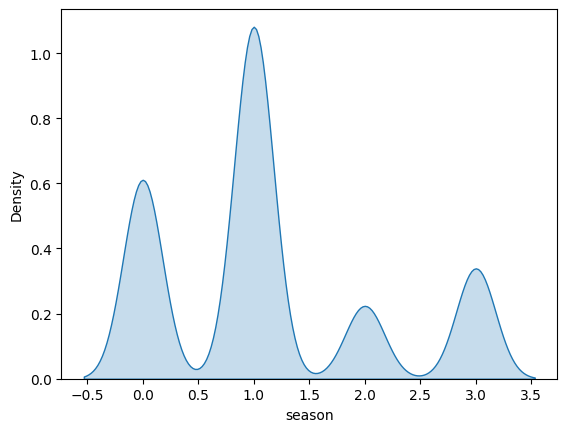

In [66]:
for x in df.columns:
    sns.kdeplot(data=df,x=x,fill=True)
    plt.show()

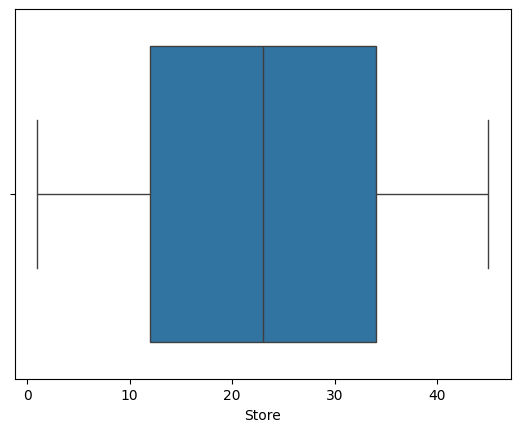

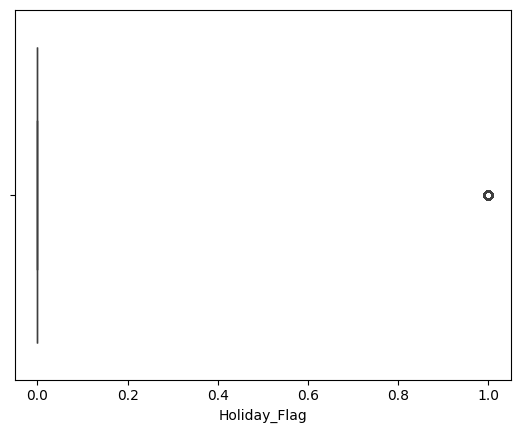

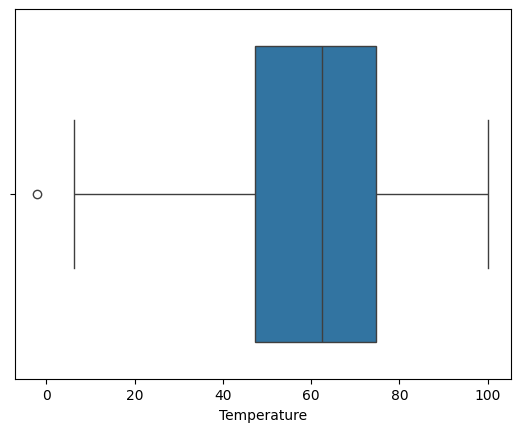

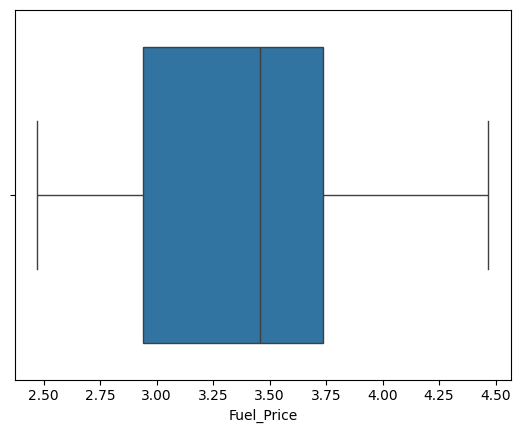

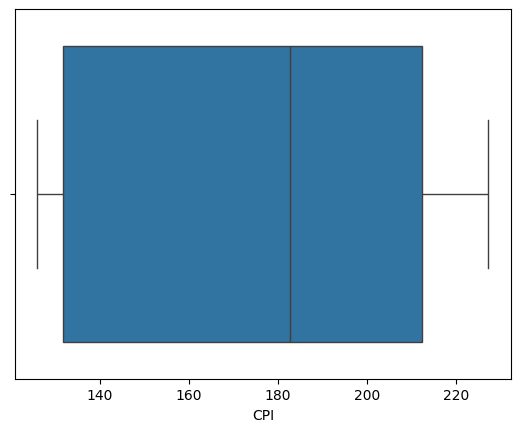

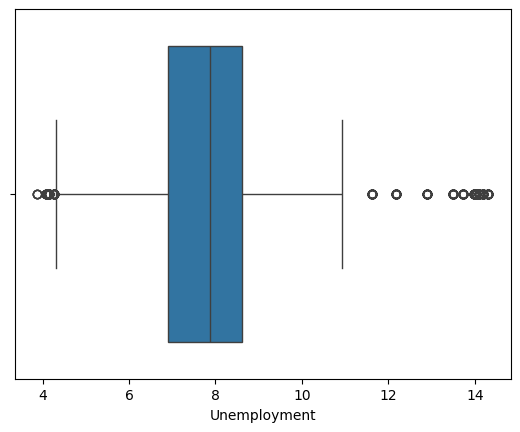

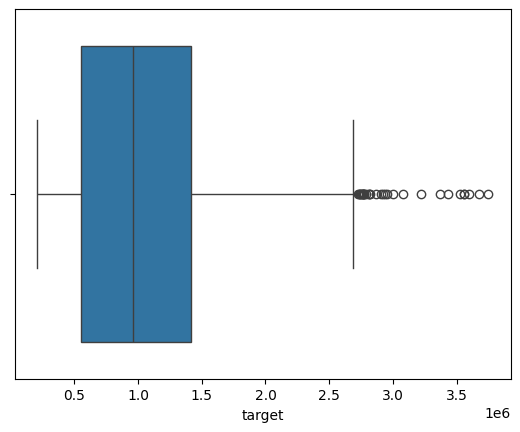

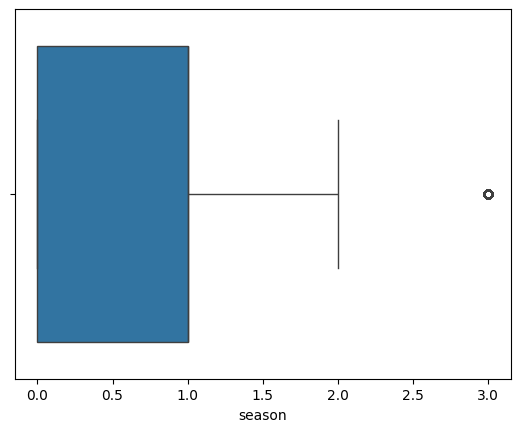

In [67]:
for x in df.columns:
    sns.boxplot(data=df,x=x,fill=True)
    plt.show()

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Fit KMeans
clus = KMeans(n_clusters=4, random_state=42)
clus.fit(df)
labels = clus.labels_  # Cluster assignments
df['labels']=pd.Series(labels)
df_lb_3=df[df['labels']==3]
df_lb_3.describe()

Store  Holiday_Flag  Temperature   Fuel_Price          CPI  \
count  1361.000000   1361.000000  1361.000000  1361.000000  1361.000000   
mean     25.933872      0.062454    55.606363     3.365859   156.727152   
std      11.109616      0.242067    18.588577     0.463640    33.955531   
min       7.000000      0.000000     6.230000     2.514000   126.064000   
25%      17.000000      0.000000    41.420000     2.885000   131.126667   
50%      25.000000      0.000000    57.200000     3.488000   137.063258   
75%      35.000000      0.000000    70.090000     3.770000   190.395829   
max      45.000000      1.000000    99.220000     4.468000   227.036936   

       Unemployment        target       season  labels  
count   1361.000000  1.361000e+03  1361.000000  1361.0  
mean       8.237593  9.412774e+05     1.151359     3.0  
std        2.147247  1.258392e+05     1.000301     0.0  
min        4.125000  7.085683e+05     0.000000     3.0  
25%        6.866000  8.486306e+05     0.000000     3.0  
50%        8.256000  9.446987e+05     1.000000     3.0  
75%        8.963000  1.044079e+06     2.000000     3.0  
max       14.313000  1.175004e+06     3.000000     3.0

In [69]:
df_lb_2=df[df['labels']==2]
df_lb_2.describe()

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count  752.000000    752.000000   752.000000  752.000000  752.000000   
mean    12.706117      0.086436    60.256370    3.340972  165.118308   
std      8.504252      0.281194    17.394559    0.431499   38.567061   
min      1.000000      0.000000    16.940000    2.514000  126.064000   
25%      4.000000      0.000000    47.157500    2.940000  129.315266   
50%     13.000000      0.000000    62.205000    3.391000  138.815049   
75%     20.000000      0.000000    75.035000    3.697500  208.810054   
max     41.000000      1.000000    92.890000    4.449000  223.491985   

       Unemployment        target      season  labels  
count    752.000000  7.520000e+02  752.000000   752.0  
mean       7.498854  2.030820e+06    1.077128     2.0  
std        1.287881  2.793769e+05    0.922804     0.0  
min        3.879000  1.720222e+06    0.000000     2.0  
25%        6.961000  1.866604e+06    0.000000     2.0  
50%        7.725000  1.962960e+06    1.000000     2.0  
75%        8.239000  2.098261e+06    1.000000     2.0  
max       14.313000  3.749058e+06    3.000000     2.0

In [70]:
df_lb_1=df[df['labels']==1]
df_lb_1.describe()

Store  Holiday_Flag  Temperature   Fuel_Price          CPI  \
count  1208.000000   1208.000000  1208.000000  1208.000000  1208.000000   
mean     22.069536      0.067053    62.121747     3.387195   178.562631   
std      12.097031      0.250217    17.678026     0.460758    39.417750   
min       1.000000      0.000000    14.560000     2.514000   126.064000   
25%      11.000000      0.000000    49.025000     2.976000   136.031508   
50%      23.000000      0.000000    64.905000     3.485500   195.561245   
75%      31.000000      0.000000    75.522500     3.749250   215.069578   
max      45.000000      1.000000    99.220000     4.468000   226.987364   

       Unemployment        target       season  labels  
count   1208.000000  1.208000e+03  1208.000000  1208.0  
mean       7.843089  1.409932e+06     1.126656     1.0  
std        1.873801  1.457675e+05     0.966558     0.0  
min        4.125000  1.175326e+06     0.000000     1.0  
25%        6.908000  1.292653e+06     0.000000     1.0  
50%        7.806000  1.395525e+06     1.000000     1.0  
75%        8.300000  1.520279e+06     1.000000     1.0  
max       14.313000  1.716756e+06     3.000000     1.0

In [71]:
df_lb_0=df[df['labels']==0]
df_lb_0.describe()

Store  Holiday_Flag  Temperature   Fuel_Price          CPI  \
count  1827.000000   1827.000000  1827.000000  1827.000000  1827.000000   
mean     26.025725      0.062945    62.991522     3.355402   180.583792   
std      14.052861      0.242930    18.650111     0.458921    39.407475   
min       3.000000      0.000000    -2.060000     2.472000   126.064000   
25%      15.000000      0.000000    50.740000     2.943000   131.661500   
50%      30.000000      0.000000    65.160000     3.441000   198.098420   
75%      38.000000      0.000000    77.925000     3.723000   214.649433   
max      45.000000      1.000000   100.140000     4.468000   227.232807   

       Unemployment         target       season  labels  
count   1827.000000    1827.000000  1827.000000  1827.0  
mean       8.123819  475199.043082     1.135194     0.0  
std        1.810072  126583.169081     0.988878     0.0  
min        4.954000  209986.250000     0.000000     0.0  
25%        6.868000  366646.905000     0.000000     0.0  
50%        7.874000  489408.530000     1.000000     0.0  
75%        8.920500  576292.200000     2.000000     0.0  
max       14.313000  707895.720000     3.000000     0.0

In [72]:
X=df.drop(columns=['target','labels'])
sq=FunctionTransformer(func=np.square)
sqrt=FunctionTransformer(func=np.sqrt)
log=FunctionTransformer(func=np.log1p)
yeo=PowerTransformer(method='yeo-johnson')


df_sq=sq.fit_transform(X)
df_sqrt=sqrt.fit_transform(X)
df_log=log.fit_transform(X)
df_yeo=pd.DataFrame(yeo.fit_transform(X),columns=X.columns)

/Users/gautammehta/Desktop/walmart_sales_forecast_project/venv/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
/Users/gautammehta/Desktop/walmart_sales_forecast_project/venv/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


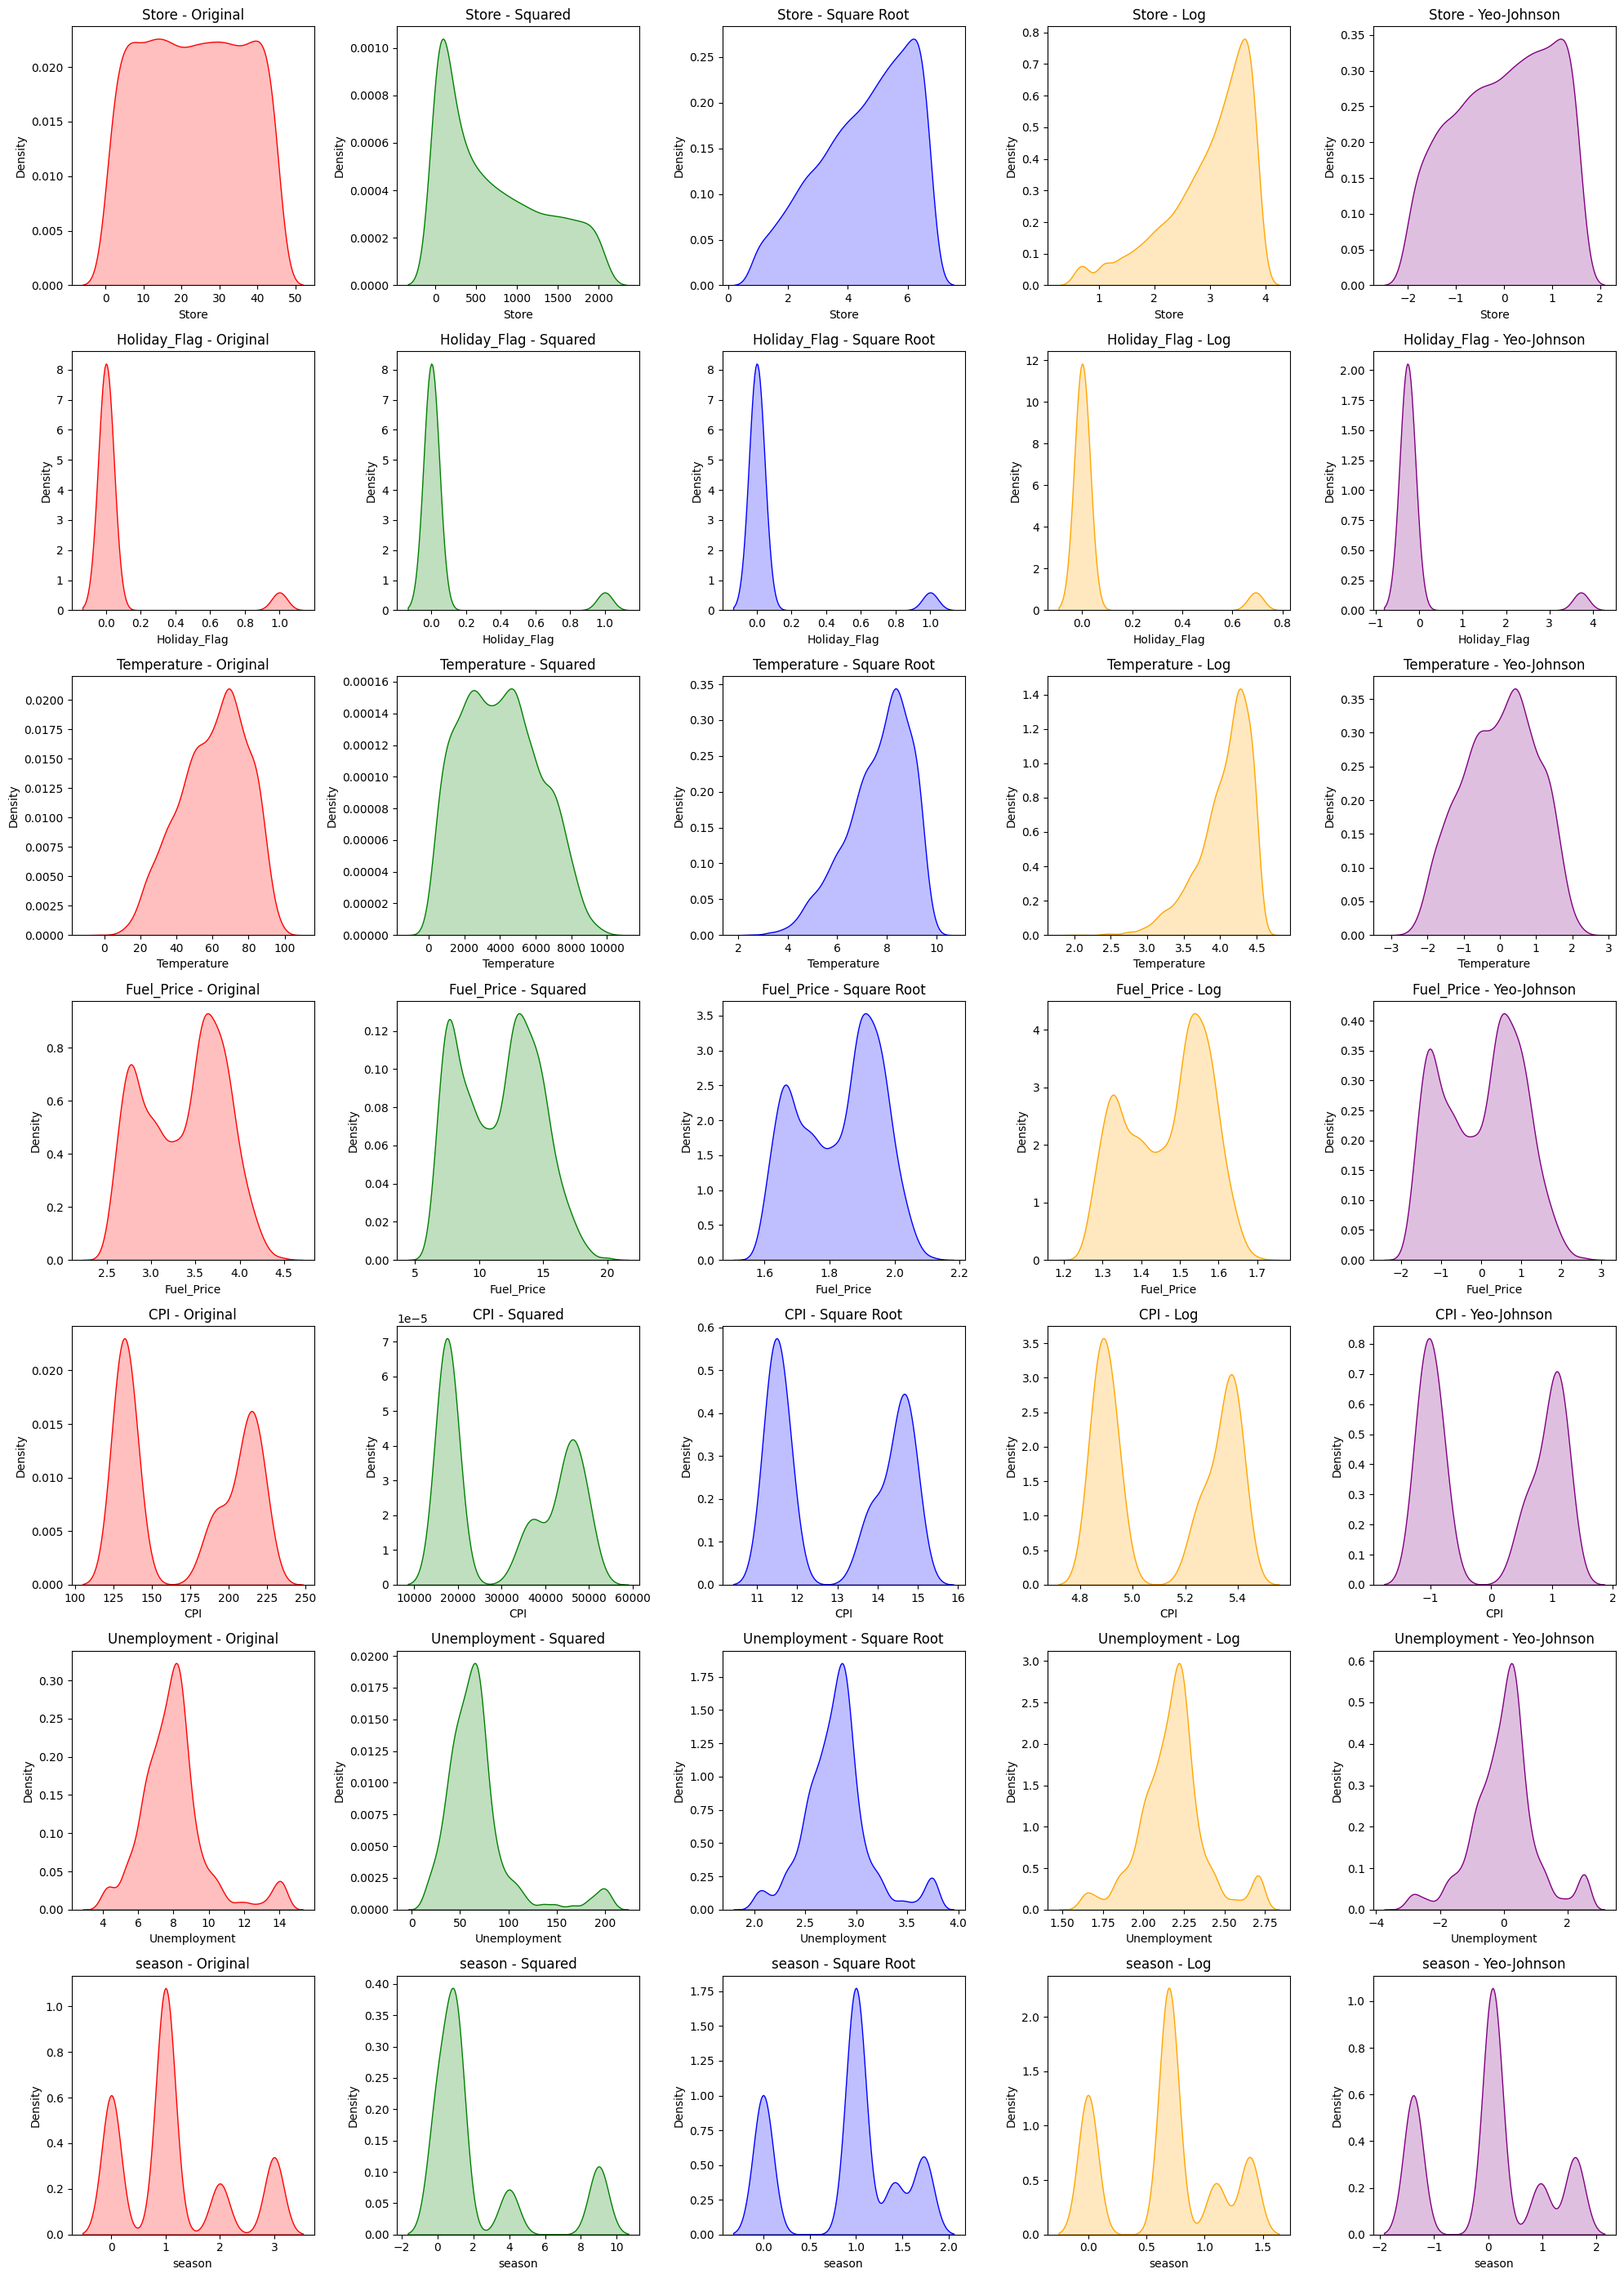

In [73]:

# Create subplots
fig, axes = plt.subplots(nrows=len(X.columns), ncols=5, figsize=(20, 4*len(X.columns)))

for r, col in enumerate(X.columns):
    sns.kdeplot(data=X, x=col, ax=axes[r, 0],fill=True,color='red')
    axes[r, 0].set_title(f'{col} - Original')

    sns.kdeplot(data=df_sq, x=col, ax=axes[r, 1],fill=True,color='green')
    axes[r, 1].set_title(f'{col} - Squared')

    sns.kdeplot(data=df_sqrt, x=col, ax=axes[r, 2],fill=True,color='blue')
    axes[r, 2].set_title(f'{col} - Square Root')

    sns.kdeplot(data=df_log, x=col, ax=axes[r, 3],fill=True,color='orange')
    axes[r, 3].set_title(f'{col} - Log')

    sns.kdeplot(data=df_yeo, x=col, ax=axes[r, 4],fill=True,color='purple')
    axes[r, 4].set_title(f'{col} - Yeo-Johnson')

plt.tight_layout()
plt.show()


In [74]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    4802
1     346
Name: count, dtype: int64

In [75]:
len(X)

5148

In [76]:
def remove_outliers_iqr(df, multiplier=2):
    df_clean = X.copy()
    df_clean.drop(columns='Holiday_Flag',inplace=True)
    for col in df_clean.select_dtypes(include='number').columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
    return df_clean

df_clean=remove_outliers_iqr(X)


In [77]:
((len(X)-df_clean.shape[0])/len(X))*100

5.186480186480186

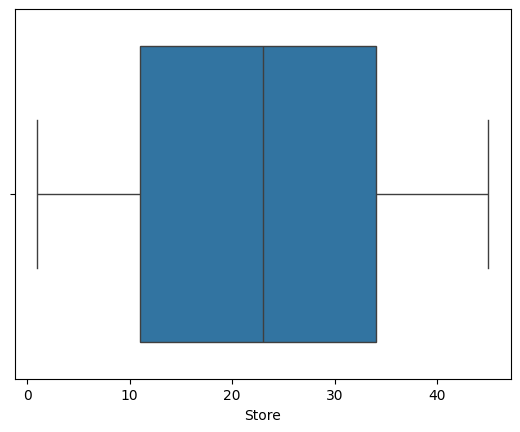

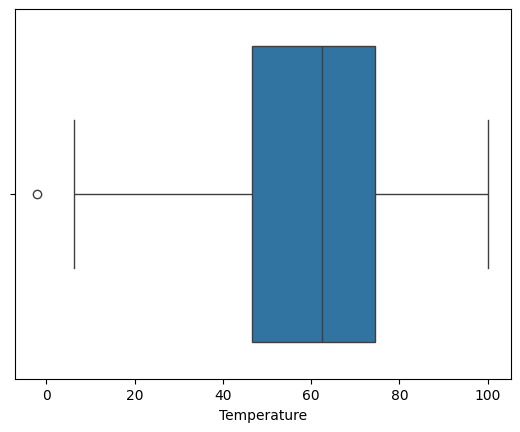

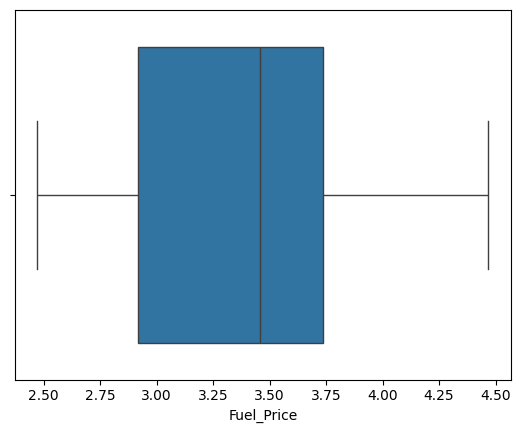

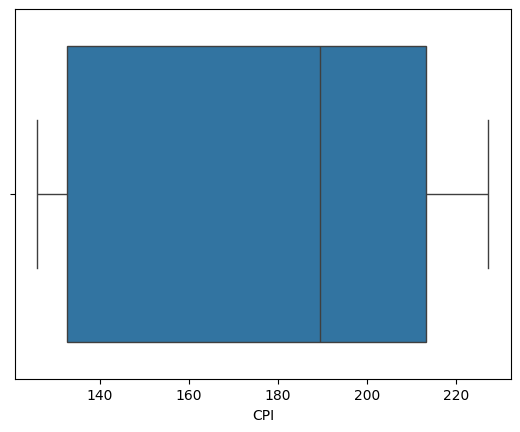

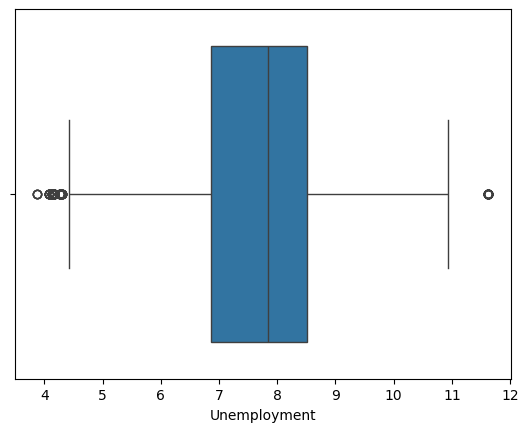

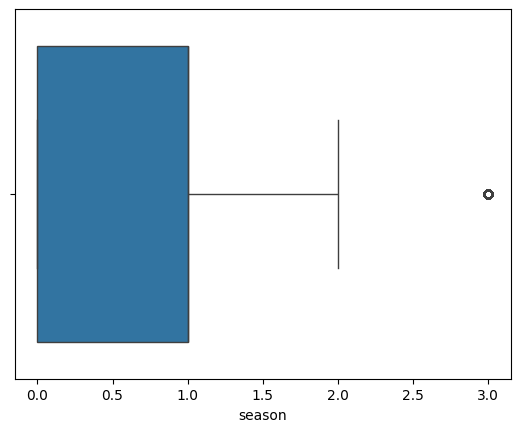

In [78]:
for x in df_clean.columns:
    sns.boxplot(data=df_clean,x=x,fill=True)
    plt.show()

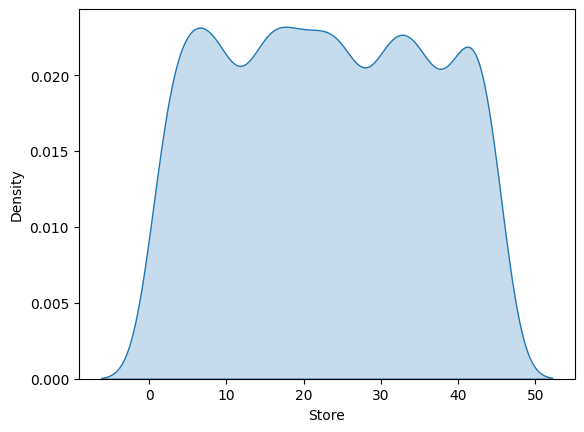

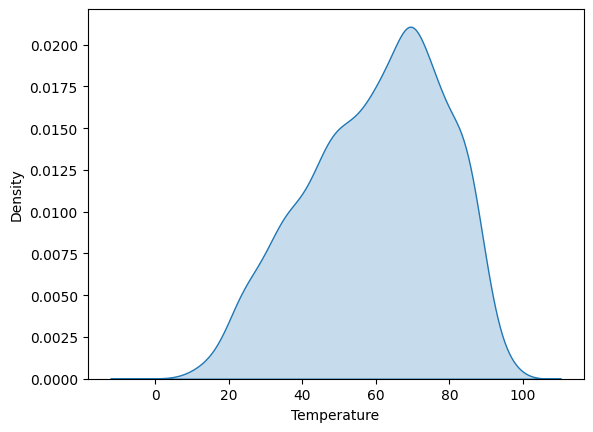

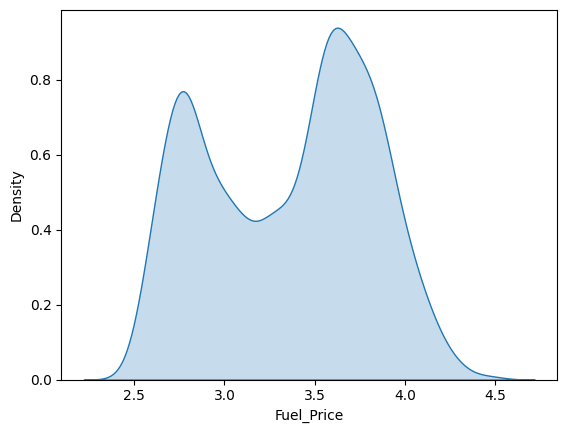

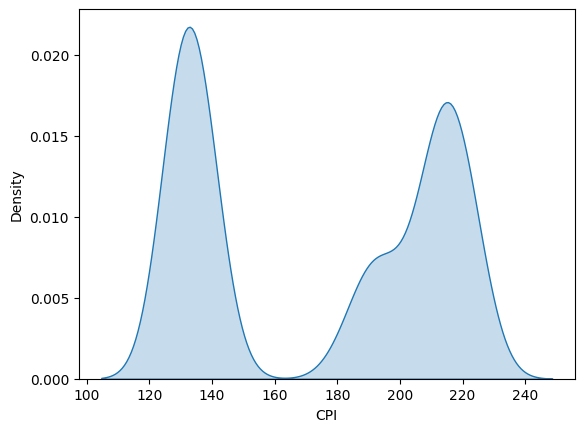

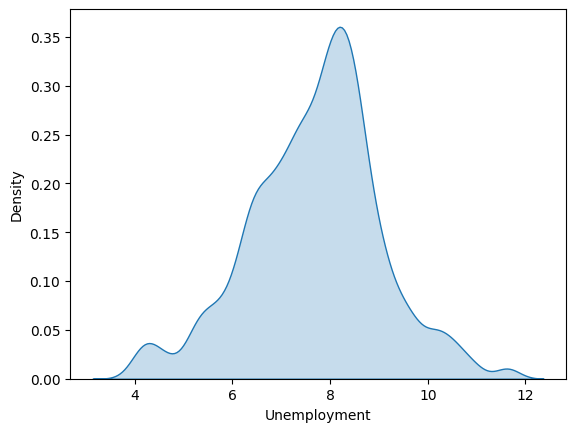

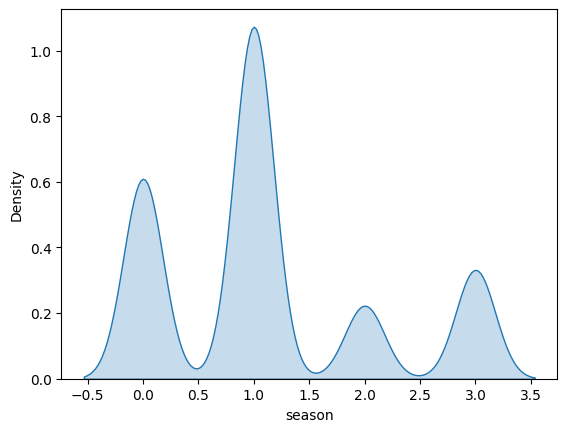

Store  Temperature   Fuel_Price          CPI  Unemployment  \
count  4881.000000  4881.000000  4881.000000  4881.000000   4881.000000   
mean     22.973571    60.039410     3.356828   173.922032      7.686803   
std      13.084354    18.490273     0.458169    38.945180      1.350928   
min       1.000000    -2.060000     2.472000   126.064000      3.879000   
25%      11.000000    46.650000     2.917000   132.756800      6.866000   
50%      23.000000    62.350000     3.459000   189.488260      7.838000   
75%      34.000000    74.370000     3.734000   213.171975      8.512000   
max      45.000000   100.140000     4.468000   227.232807     11.627000   

            season  
count  4881.000000  
mean      1.123745  
std       0.974812  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       3.000000

In [79]:
for x in df_clean.columns:
    sns.kdeplot(data=df_clean,x=x,fill=True)
    plt.show()

df_clean.describe()

In [80]:
df_clean['Holiday']=X['Holiday_Flag']


In [81]:
df_clean.head(5)

Store  Temperature  Fuel_Price         CPI  Unemployment  season  Holiday
0      8        75.32       2.582  214.878556         6.315       1        0
1      7        20.70       3.372  192.058484         8.818       3        0
2     42        61.24       3.130  126.546161         9.003       1        0
3     15        69.19       3.906  136.213613         7.806       1        0
4     42        87.40       3.743  129.240581         8.257       1        0

In [82]:
scaling=StandardScaler()
df_clean=pd.DataFrame(scaling.fit_transform(df_clean),columns=df_clean.columns)
df_clean.head(5)

Store  Temperature  Fuel_Price       CPI  Unemployment    season  \
0 -1.144505     0.826497   -1.691315  1.051753     -1.015556 -0.126956   
1 -1.220940    -2.127791    0.033118  0.465740      0.837434  1.924933   
2  1.454285     0.064938   -0.495126 -1.216600      0.974391 -0.126956   
3 -0.609460     0.494937    1.198747 -0.968343      0.088242 -0.126956   
4  1.454285     1.479880    0.842946 -1.147408      0.422121 -0.126956   

    Holiday  
0 -0.268842  
1 -0.268842  
2 -0.268842  
3 -0.268842  
4 -0.268842

In [84]:
df_clean['target']=df_y['Weekly_Sales']

In [86]:
df_clean.shape
df_clean.head(5)

Store  Temperature  Fuel_Price       CPI  Unemployment    season  \
0 -1.144505     0.826497   -1.691315  1.051753     -1.015556 -0.126956   
1 -1.220940    -2.127791    0.033118  0.465740      0.837434  1.924933   
2  1.454285     0.064938   -0.495126 -1.216600      0.974391 -0.126956   
3 -0.609460     0.494937    1.198747 -0.968343      0.088242 -0.126956   
4  1.454285     1.479880    0.842946 -1.147408      0.422121 -0.126956   

    Holiday     target  
0 -0.268842  836707.85  
1 -0.268842  558963.83  
2 -0.268842  588592.61  
3 -0.268842  605413.17  
4 -0.268842  526641.23

In [88]:
path=os.path.join('/Users/gautammehta/Desktop/walmart_sales_forecast_project/data','processed')
os.makedirs(path,exist_ok=True)
df_clean.to_csv(os.path.join(path,'processed_data'))